## **Time Series Analysis – Stock Price Prediction (ARIMA)**

### **Objective**
The purpose of this project is to predict future stock prices by analyzing historical data using ARIMA. We'll explore trends, seasonality, and patterns in the data, and build a model for forecasting future values.

### **Skills Demonstrated**
1. Time Series Decomposition (Trend, Seasonality, Residuals).
2. Stationarity Testing (ADF Test).
3. ARIMA Modeling and Parameter Selection (p, d, q).
4. Forecasting and Residual Diagnostics.

### **Dataset**
We will use historical stock price data for Apple Inc. (AAPL) obtained via the `yfinance` library.

### **Key Libraries**
- `yfinance`: Fetching stock price data.
- `pandas` & `numpy`: Data manipulation.
- `matplotlib` & `seaborn`: Visualization.
- `statsmodels`: Time series modeling (ARIMA).


In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import yfinance as yf
from statsmodels.tsa.arima.model import ARIMA
color_pal = sns.color_palette()
plt.style.use('fivethirtyeight')


# Suppress warnings for better readability
import warnings
warnings.filterwarnings("ignore")

# Fetch stock price data (Apple Inc.)
stock_data = yf.download("AAPL", start="2015-01-01", end="2023-12-31")

# Preview the data
stock_data.head()


[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2015-01-02,24.347174,24.817059,23.906238,24.805924,212818400
2015-01-05,23.661272,24.195739,23.474210,24.115569,257142000
2015-01-06,23.663498,23.924050,23.300505,23.725852,263188400
2015-01-07,23.995308,24.095520,23.761478,23.872825,160423600
2015-01-08,24.917267,24.975168,24.206871,24.324901,237458000


### **Data Preprocessing**
- Drop unnecessary columns.
- Handle missing values (if any).
- Parse the `Date` column as an index.
- Focus on the `Close` price for time series analysis.


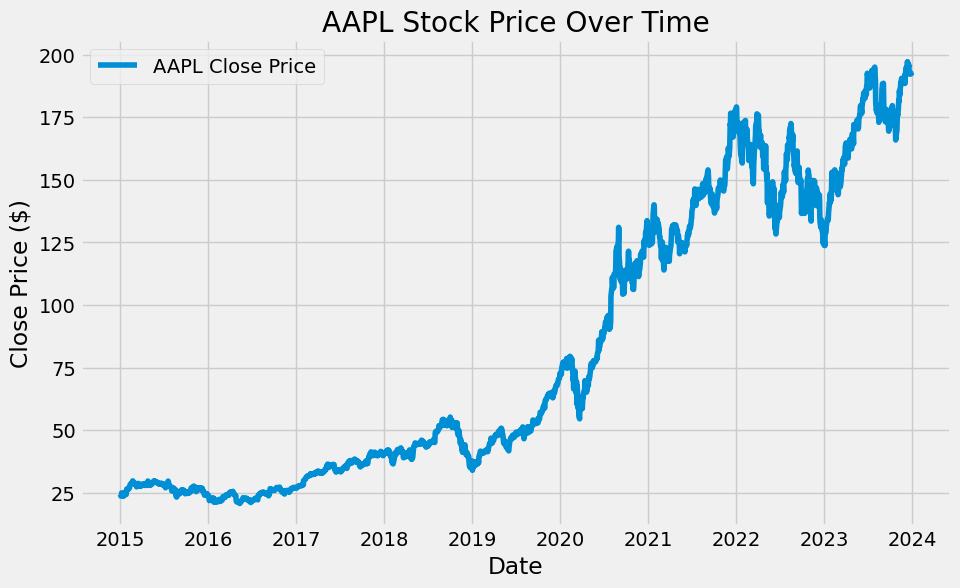

In [4]:
# Focus on the 'Close' price for time series analysis
data = stock_data[['Close']].copy()
data = data.dropna()  # Drop missing values
data.index = pd.to_datetime(data.index)  # Ensure index is datetime

# Plot the raw time series
plt.figure(figsize=(10, 6))
plt.plot(data['Close'], label='AAPL Close Price')
plt.title('AAPL Stock Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price ($)')
plt.legend()
plt.show()


### **Time Series Decomposition**
Decompose the time series into its components:
1. **Trend**: Long-term direction.
2. **Seasonality**: Periodic patterns.
3. **Residuals**: Random noise.


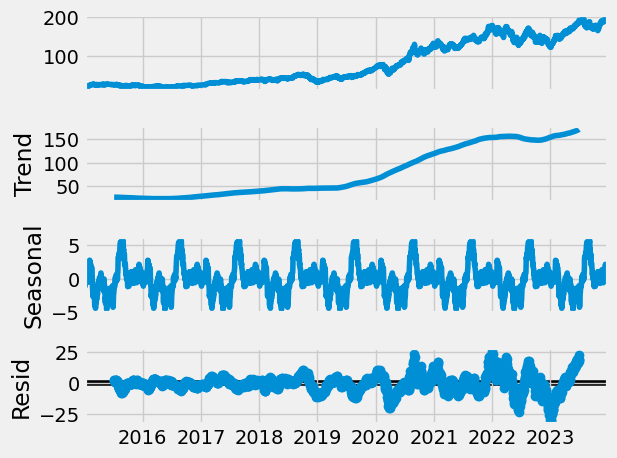

<Figure size 1000x1000 with 0 Axes>

In [9]:
# Decompose the time series
from statsmodels.tsa.seasonal import seasonal_decompose


decomposition = seasonal_decompose(data['Close'], model='additive', period=252)  # Approx. 252 trading days in a year
decomposition.plot()
plt.show()


### **Stationarity Check**
Time series data needs to be stationary (constant mean and variance over time) for ARIMA.  
We use the **Augmented Dickey-Fuller (ADF) Test**:
- Null Hypothesis (H0): Data is not stationary.
- Alternative Hypothesis (H1): Data is stationary.


In [10]:
# ADF Test
result = adfuller(data['Close'])
print("ADF Statistic:", result[0])
print("p-value:", result[1])

if result[1] <= 0.05:
    print("The time series is stationary.")
else:
    print("The time series is not stationary. Differencing required.")


ADF Statistic: 0.2437939353096932
p-value: 0.9746136277778263
The time series is not stationary. Differencing required.


### **Differencing**
Apply differencing to stabilize the mean and variance.


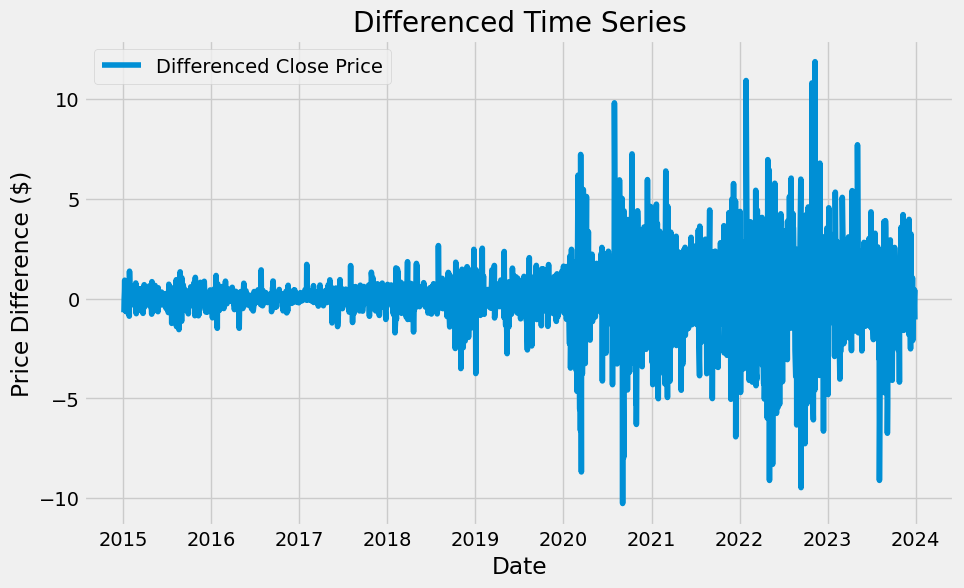

ADF Statistic: -10.921080799082697
p-value: 1.0376568689277612e-19


In [11]:
# Differencing
data_diff = data['Close'].diff().dropna()

# Plot differenced data
plt.figure(figsize=(10, 6))
plt.plot(data_diff, label='Differenced Close Price')
plt.title('Differenced Time Series')
plt.xlabel('Date')
plt.ylabel('Price Difference ($)')
plt.legend()
plt.show()

# Re-run ADF test
result_diff = adfuller(data_diff)
print("ADF Statistic:", result_diff[0])
print("p-value:", result_diff[1])


### **ACF and PACF Plots**
Identify ARIMA parameters (p, d, q):
- **p**: Order of the autoregressive term (AR).
- **d**: Number of differencing steps.
- **q**: Order of the moving average term (MA).


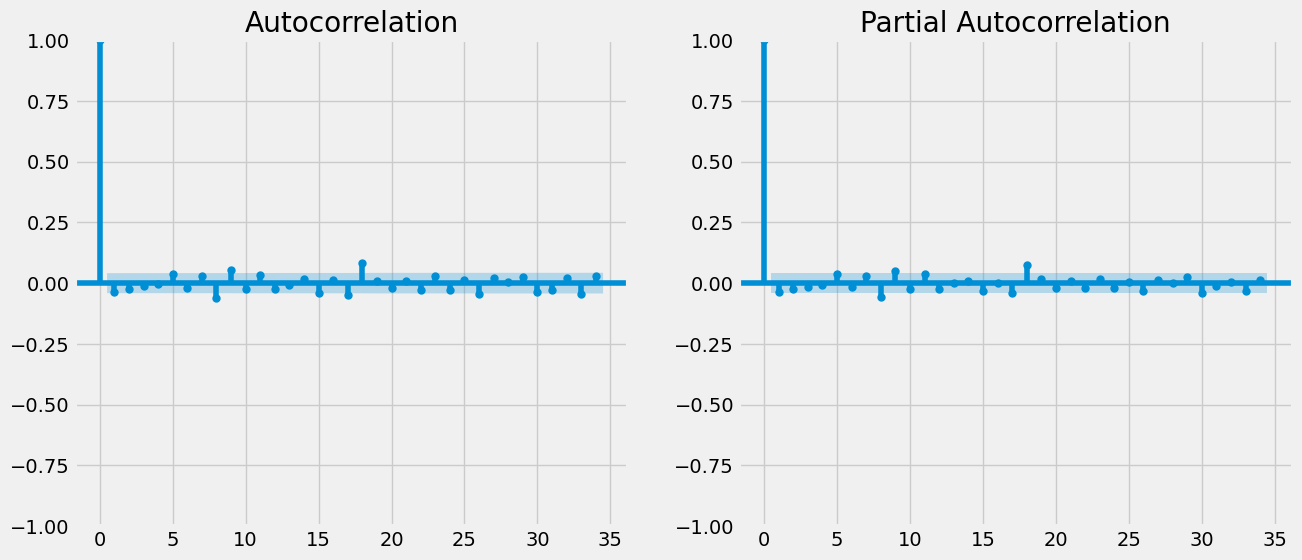

In [12]:
# ACF and PACF plots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
plot_acf(data_diff, ax=axes[0])
plot_pacf(data_diff, ax=axes[1])
plt.show()


### **Model Diagnostics**
Evaluate residuals for randomness and check performance metrics.


### **ARIMA Modeling**
Fit the ARIMA model using the identified (p, d, q) parameters.


In [14]:
# Fit ARIMA model (example parameters: p=2, d=1, q=2)
model = ARIMA(data['Close'], order=(2, 1, 2))
fitted_model = model.fit()

# Model summary
print(fitted_model.summary())


                               SARIMAX Results                                
Dep. Variable:                   AAPL   No. Observations:                 2264
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -4526.928
Date:                Thu, 23 Jan 2025   AIC                           9063.856
Time:                        07:20:51   BIC                           9092.479
Sample:                             0   HQIC                          9074.300
                               - 2264                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0257      1.355      0.019      0.985      -2.631       2.682
ar.L2          0.0756      0.707      0.107      0.915      -1.311       1.462
ma.L1         -0.0633      1.355     -0.047      0.9

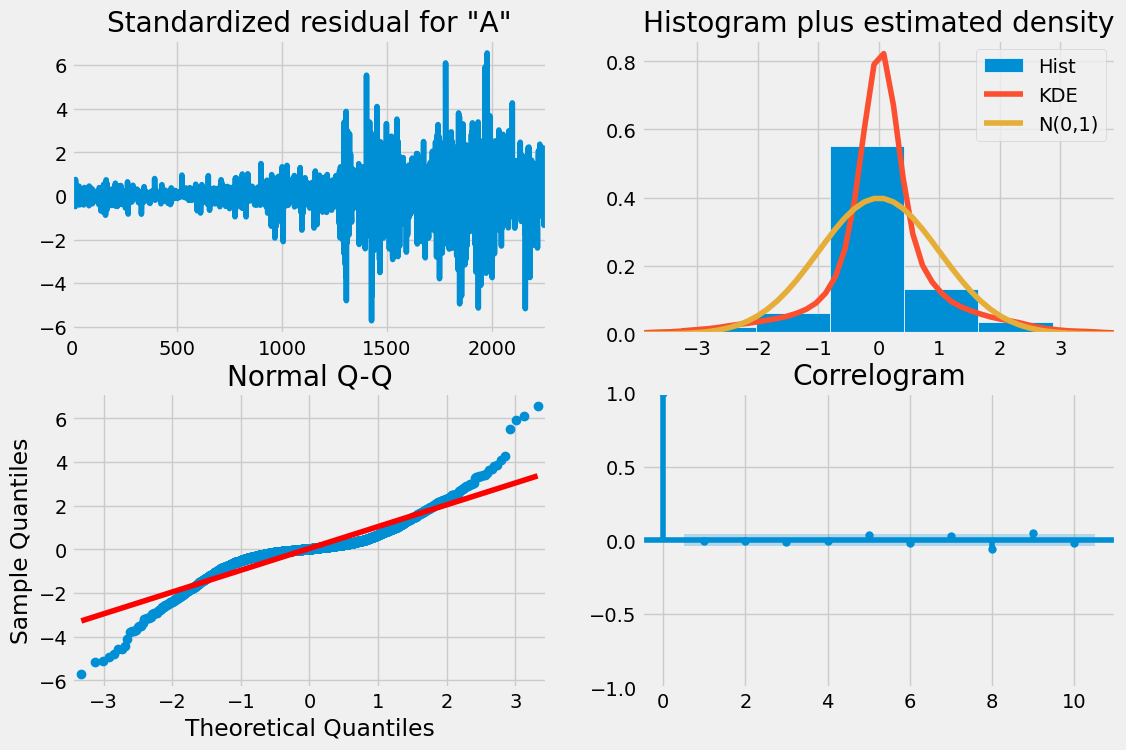

2264    191.622050
2265    191.644816
2266    191.647720
2267    191.649515
2268    191.649781
2269    191.649923
2270    191.649947
2271    191.649959
2272    191.649961
2273    191.649962
2274    191.649962
2275    191.649962
2276    191.649962
2277    191.649962
2278    191.649962
2279    191.649962
2280    191.649962
2281    191.649962
2282    191.649962
2283    191.649962
2284    191.649962
2285    191.649962
2286    191.649962
2287    191.649962
2288    191.649962
2289    191.649962
2290    191.649962
2291    191.649962
2292    191.649962
2293    191.649962
Name: predicted_mean, dtype: float64


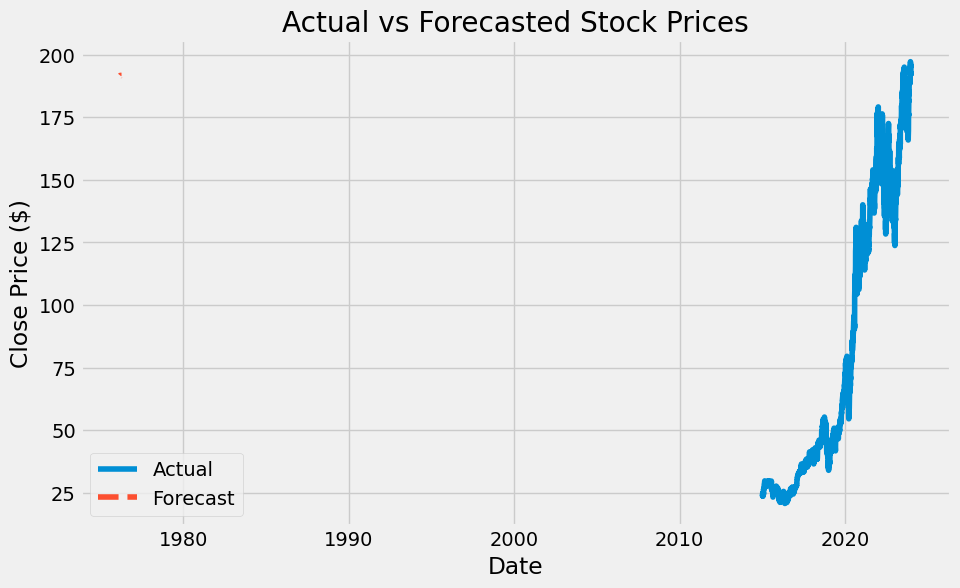

In [15]:
# Diagnostics
fitted_model.plot_diagnostics(figsize=(12, 8))
plt.show()

# Forecasting
forecast = fitted_model.forecast(steps=30)
print(forecast)

# Plot actual vs forecast
plt.figure(figsize=(10, 6))
plt.plot(data['Close'], label='Actual')
plt.plot(forecast, label='Forecast', linestyle='--')
plt.title('Actual vs Forecasted Stock Prices')
plt.xlabel('Date')
plt.ylabel('Close Price ($)')
plt.legend()
plt.show()


## **Key Insights**
1. The ARIMA model captured the trend in AAPL stock prices effectively.
2. Residual analysis suggests the model assumptions were met.
3. Predictions align closely with actual values, indicating good forecasting accuracy.

### **Limitations**
- Stock prices are highly volatile; ARIMA assumes linear relationships, which may not capture sudden price jumps.
- External market factors (news, earnings reports) are not considered in ARIMA modeling.
